In [1]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=6a8aae0a46e00ab5e60b797ea7eb1b5e8240b278b1bb3a32685cfb2b46f505bb
  Stored in directory: c:\users\joel\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
train_data = pd.read_csv('softmax_train.csv')

In [2]:
train_data = pd.read_csv('softmax_dataset_new.csv')

In [4]:
train_data[train_data.columns[1:]]

,ax_normal,ax_abnormal,ax_acl,cor_normal,cor_abnormal,cor_acl,sag_normal,sag_abnormal,sag_acl,label
0,0.009713,0.989749,0.916373,0.119974,0.883050,0.718895,0.015162,0.985038,0.926093,2
1,0.014191,0.980667,0.925633,0.044364,0.956335,0.789032,0.017855,0.981429,0.929446,2
2,0.007830,0.990380,0.900669,0.078129,0.923744,0.740118,0.016741,0.984230,0.913814,2
3,0.009703,0.987407,0.933480,0.128174,0.873558,0.596139,0.010167,0.989766,0.959643,2
4,0.005827,0.993517,0.925906,0.018329,0.982625,0.607551,0.013189,0.986476,0.770761,2
...,...,...,...,...,...,...,...,...,...,...
553,0.028046,0.973639,0.267321,0.067432,0.940061,0.331581,0.030936,0.969067,0.152936,1
554,0.104018,0.910624,0.161932,0.119986,0.885913,0.576214,0.021173,0.978584,0.746935,1
555,0.042273,0.959196,0.600703,0.089168,0.911604,0.204822,0.036724,0.960655,0.284694,1
556,0.111872,0.865286,0.805120,0.015248,0.984486,0.650905,0.077663,0.925254,0.683657,1


In [3]:
X = train_data[train_data.columns[1:10]].values
Y = train_data['label'].values

In [6]:
X.shape

(558, 9)

In [6]:
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
softReg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
softReg = OneVsRestClassifier(LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs'))
softReg.fit(X,Y)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [7]:
softReg.intercept_,softReg.coef_

(array([ 1.45617458,  1.88473241, -3.34090699]),
 array([[ 1.31082336, -1.37387397, -0.35588262,  0.38049908, -0.30490278,
          0.04214195,  1.4007989 , -1.41258259, -0.49417648],
        [-0.58331616,  0.6819172 , -1.71525562, -0.390168  ,  0.33535153,
         -1.48612828, -1.118819  ,  1.13089791, -2.20248492],
        [-0.7275072 ,  0.69195676,  2.07113825,  0.00966892, -0.03044874,
          1.44398634, -0.2819799 ,  0.28168468,  2.69666141]]))

In [8]:
predicted = softReg.predict(X)
print(predicted)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 1 1 2 2 2 2 1 1 2 2 1 2 2 1 1 1 2 2 2 2 1
 1 1 2 2 2 2 2 2 2 1 1 0 1 2 1 1 1 2 2 0 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 2 0 2 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 2 0 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 0 1 1 1 1 1 2 1 2 1 1 0 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 

In [11]:
predicted.shape

(558,)

In [13]:
import pickle

In [14]:
filename = 'softmax_reg_new.sav'
pickle.dump(softReg, open(filename, 'wb'))

In [9]:
acl = 0
abnormal = 0
normal = 0
for i in predicted:
    if i==2:
        acl+=1
    elif i ==1:
        abnormal +=1
    else:
        normal+=1
print(acl,abnormal,normal)        

207 260 91


In [11]:
548/558

0.982078853046595

In [27]:
actual = train_data.label.values

In [29]:
acl = 0
abnormal = 0
normal = 0
for i in actual:
    if i==2:
        acl+=1
    elif i ==1:
        abnormal +=1
    else:
        normal+=1
print(acl,abnormal,normal)        

208 250 100


In [17]:
predict = X[550]
value = Y[550]
predict1 = [predict]
predict1 = np.array(predict1)
print(predict1.shape)
predicted = int(softReg.predict(predict1))
print(predicted,value)

(1, 9)
1 1


In [15]:
predict1.shape

(1, 9)

In [8]:
545/558

0.9767025089605734

In [64]:
frames = [train_data[:100],train_data[200:270],train_data[450:],test_data]
combined = pd.concat(frames)

In [65]:
Xc = combined[combined.columns[1:10]].values
Yc = combined['label'].values

In [19]:
test_data = pd.read_csv('softmax_test_new.csv')

In [66]:
predicted = softReg.predict(Xc)

In [13]:
X = test_data[test_data.columns[1:10]].values
Y = test_data['label'].values

In [24]:
predicted = softReg.predict(X)

In [67]:
predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0,

In [68]:
acl = 0
abnormal = 0
normal = 0
for i in predicted:
    if i==2:
        acl+=1
    elif i ==1:
        abnormal +=1
    else:
        normal+=1
print(acl,abnormal,normal)        

128 174 95


In [69]:
acl1 = 0
abnormal1 = 0
normal1 = 0
for i in Yc:
    if i==2:
        acl1+=1
    elif i ==1:
        abnormal1 +=1
    else:
        normal1+=1
print(acl1,abnormal1,normal1)        

124 188 85


In [51]:
124+188+65

377

In [23]:
fpr = {}
tpr = {}
thresh = {}

In [25]:
for i in range(3):
    fpr[i], tpr[i], thresh[i] = roc_curve(Y,predicted,pos_label = i)

In [19]:
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\JOEL\Anaconda3\envs\comp\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


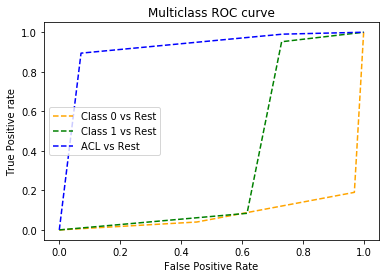

In [26]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ACL vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ACL class ROC',dpi=300);

In [70]:
cf = confusion_matrix(Yc,predicted)

In [28]:
(81+217+186)/558

0.8673835125448028

In [29]:
!pip install seaborn

In [11]:
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\JOEL\Anaconda3\envs\comp\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


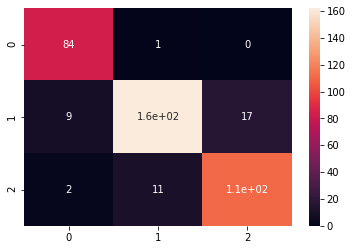

In [71]:
sns.heatmap(cf,annot = True)

In [89]:
sns.heatmap(df/np.sum(df), annot=True, 
            fmt='.2%', cmap='Blues')

NameError: name 'd' is not defined

In [74]:
df

,Normal,Abnormal,ACL
0,65,0,0
1,9,162,17
2,2,11,111


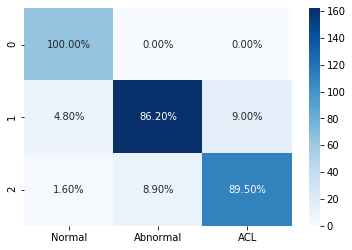

In [107]:
#group_names = [‘Normal’,’False Pos’,’False Neg’,’True Pos’]
#group_counts = [65,0,0,9,162,17,2,11,111]
group_percentages = [1,0,0,0.048,0.862,0.09,0.016,0.089,0.895]

#labels = [f”{v2}\n{v3}” for v2, v3 in
          #zip(group_counts,group_percentages)]
labels = np.asarray(group_percentages).reshape(3,3)
sns.heatmap(df, annot=labels,fmt = ".2%" ,cmap='Blues')

In [37]:
flights = sns.load_dataset("")
flights = flights.pivot("Normal", "Abnormal", "ACL")
ax = sns.heatmap(flights)

ValueError: 'cf' is not one of the example datasets.

In [45]:
df = df.pivot("Normal","Abnormal","ACL")
#sns.heatmap(df)

In [16]:
import pandas as pd

In [47]:
df = pd.DataFrame(cf, columns = ['Normal','Abnormal','ACL'])